In [1]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt

['.\\data\\20200319_not_seating.csv', '.\\data\\20200319_seating.csv', '.\\data\\20200322a_not_seating.csv', '.\\data\\20200323a_seating.csv', '.\\data\\20200323b_not_seating.csv', '.\\data\\20200323c_not_seating.csv', '.\\data\\20200324a_seating.csv', '.\\data\\20200324b_seating.csv', '.\\data\\20200324c_not_seating.csv', '.\\data\\20200324d_not_seating.csv', '.\\data\\20200324f_seating.csv']
all data count :  4568


([<matplotlib.patches.Wedge at 0x1aad5ed3c88>,
 [Text(0.9685936012782347, 0.5213697685547757, 'Seating'),
  Text(-0.9685935524640698, -0.5213698592410514, 'NOT Seating')],
 [Text(0.5283237825154007, 0.2843835101207867, '34.3%'),
  Text(-0.5283237558894925, -0.284383559586028, '65.7%')])

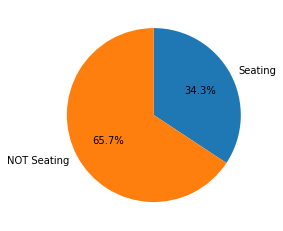

In [2]:
file_paths = glob.glob(".\\data\\*")
print(file_paths)

category =np.empty((0,1), float)
rssi =np.empty((0,100), float)

for file in file_paths:
    d = np.loadtxt(file, delimiter=',')
    category_tmp, rssi_tmp = np.hsplit(d, [1])
    rssi = np.concatenate([rssi, rssi_tmp], axis=0)
    category = np.concatenate([category, category_tmp], axis=0)

all_data_count = category.shape[0]
seating_data_count = np.count_nonzero(category > 0)
print("all data count : ", all_data_count)

data_pie = [seating_data_count, all_data_count - seating_data_count]
label = ["Seating", "NOT Seating"]
plt.pie(data_pie, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")